In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
breast_cancer = pd.read_csv('breast_cancer.csv')

In [3]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Seeing the data set for the first time, we can make some easy conclusions. The dataset has a column named "unnamed" and it consists of all Nan values. We can safely remove that column from the dataset.

In [4]:
breast_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
breast_cancer = breast_cancer.drop('Unnamed: 32', axis = 1)

In [6]:
x = breast_cancer.drop('diagnosis', axis = 1)
y = breast_cancer['diagnosis']

### Let's see the correlation between the variables by stydying the heat map

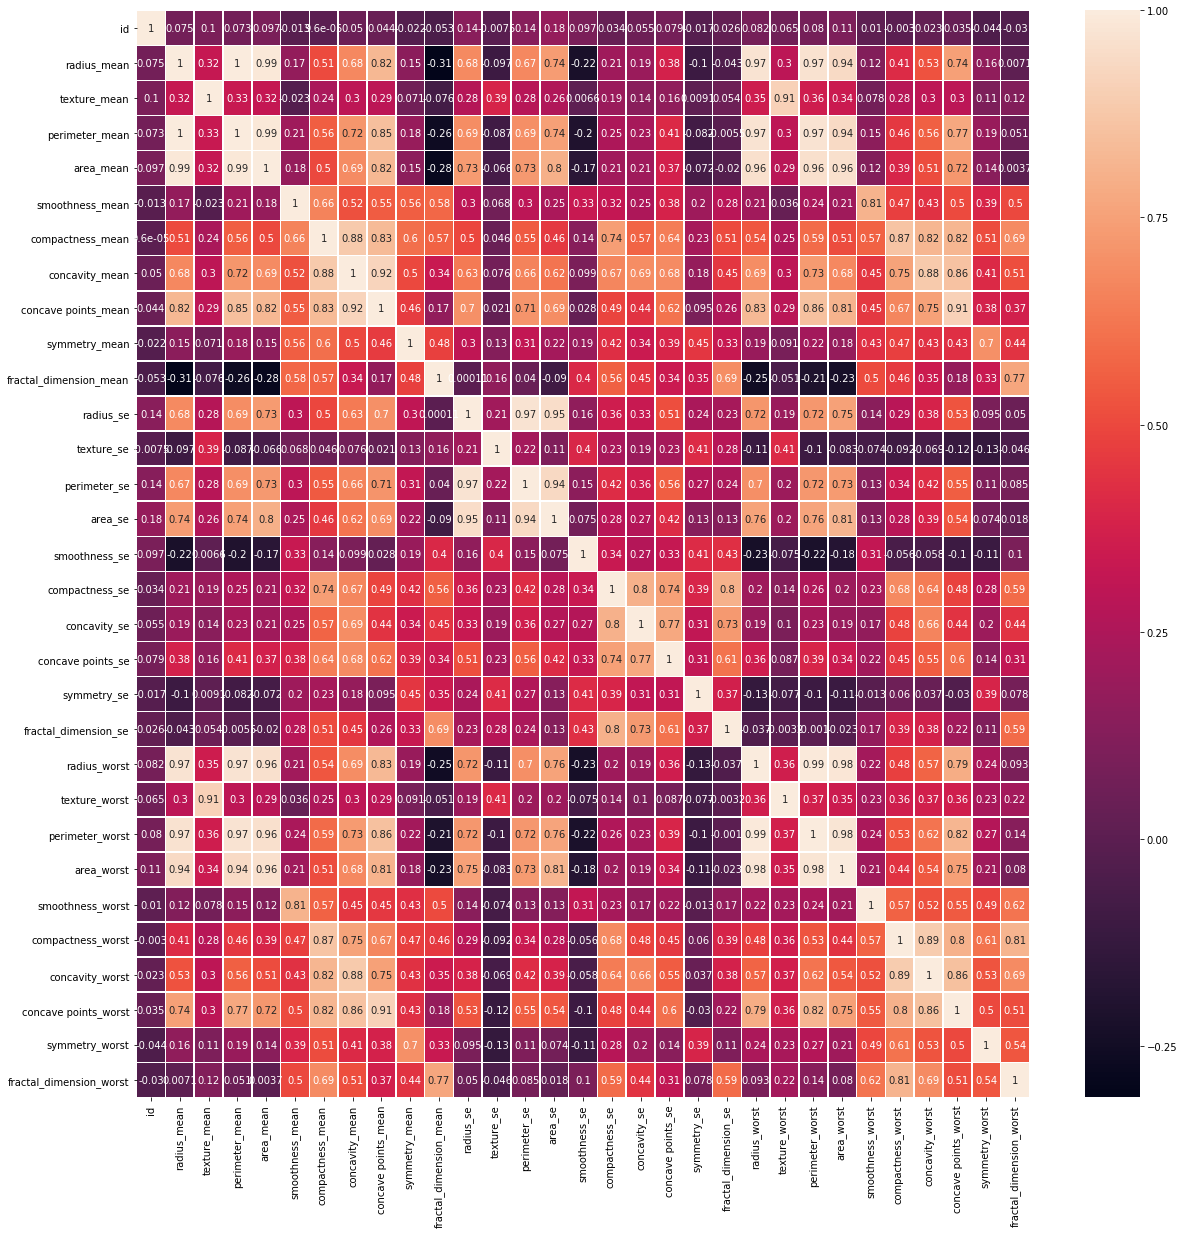

In [7]:
plt.figure(figsize = (20,20))
sns.heatmap(x.corr(), annot = True, linewidths = 0.5)

From the above heatmap, we can observe that some of the features are highly correlated with each other. For example, **radius_mean** is highly correlated with **area_worst**. 

### Let's use the joint plot to see the correlation between the two features.

C:\Users\Harshal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Harshal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 1008x864 with 0 Axes>

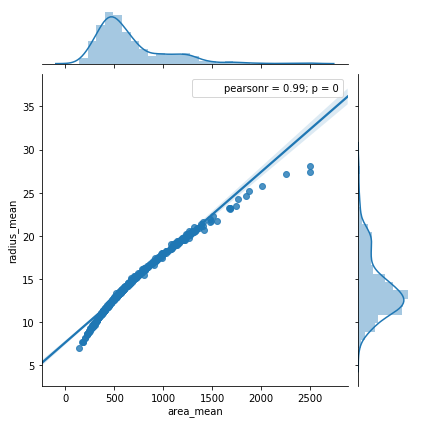

In [8]:
plt.figure(figsize = (14,12))
sns.jointplot(breast_cancer['area_mean'], breast_cancer['radius_mean'], data = breast_cancer, kind = 'reg')

In [9]:
# Features to drop
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se',\
              'radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se',\
              'concave points_se','texture_worst','area_worst']

In [10]:
breast_cancer = breast_cancer.drop(drop_list1, axis = 1)

In [11]:
breast_cancer.head()

,id,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,842517,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,84300903,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,84348301,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,84358402,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


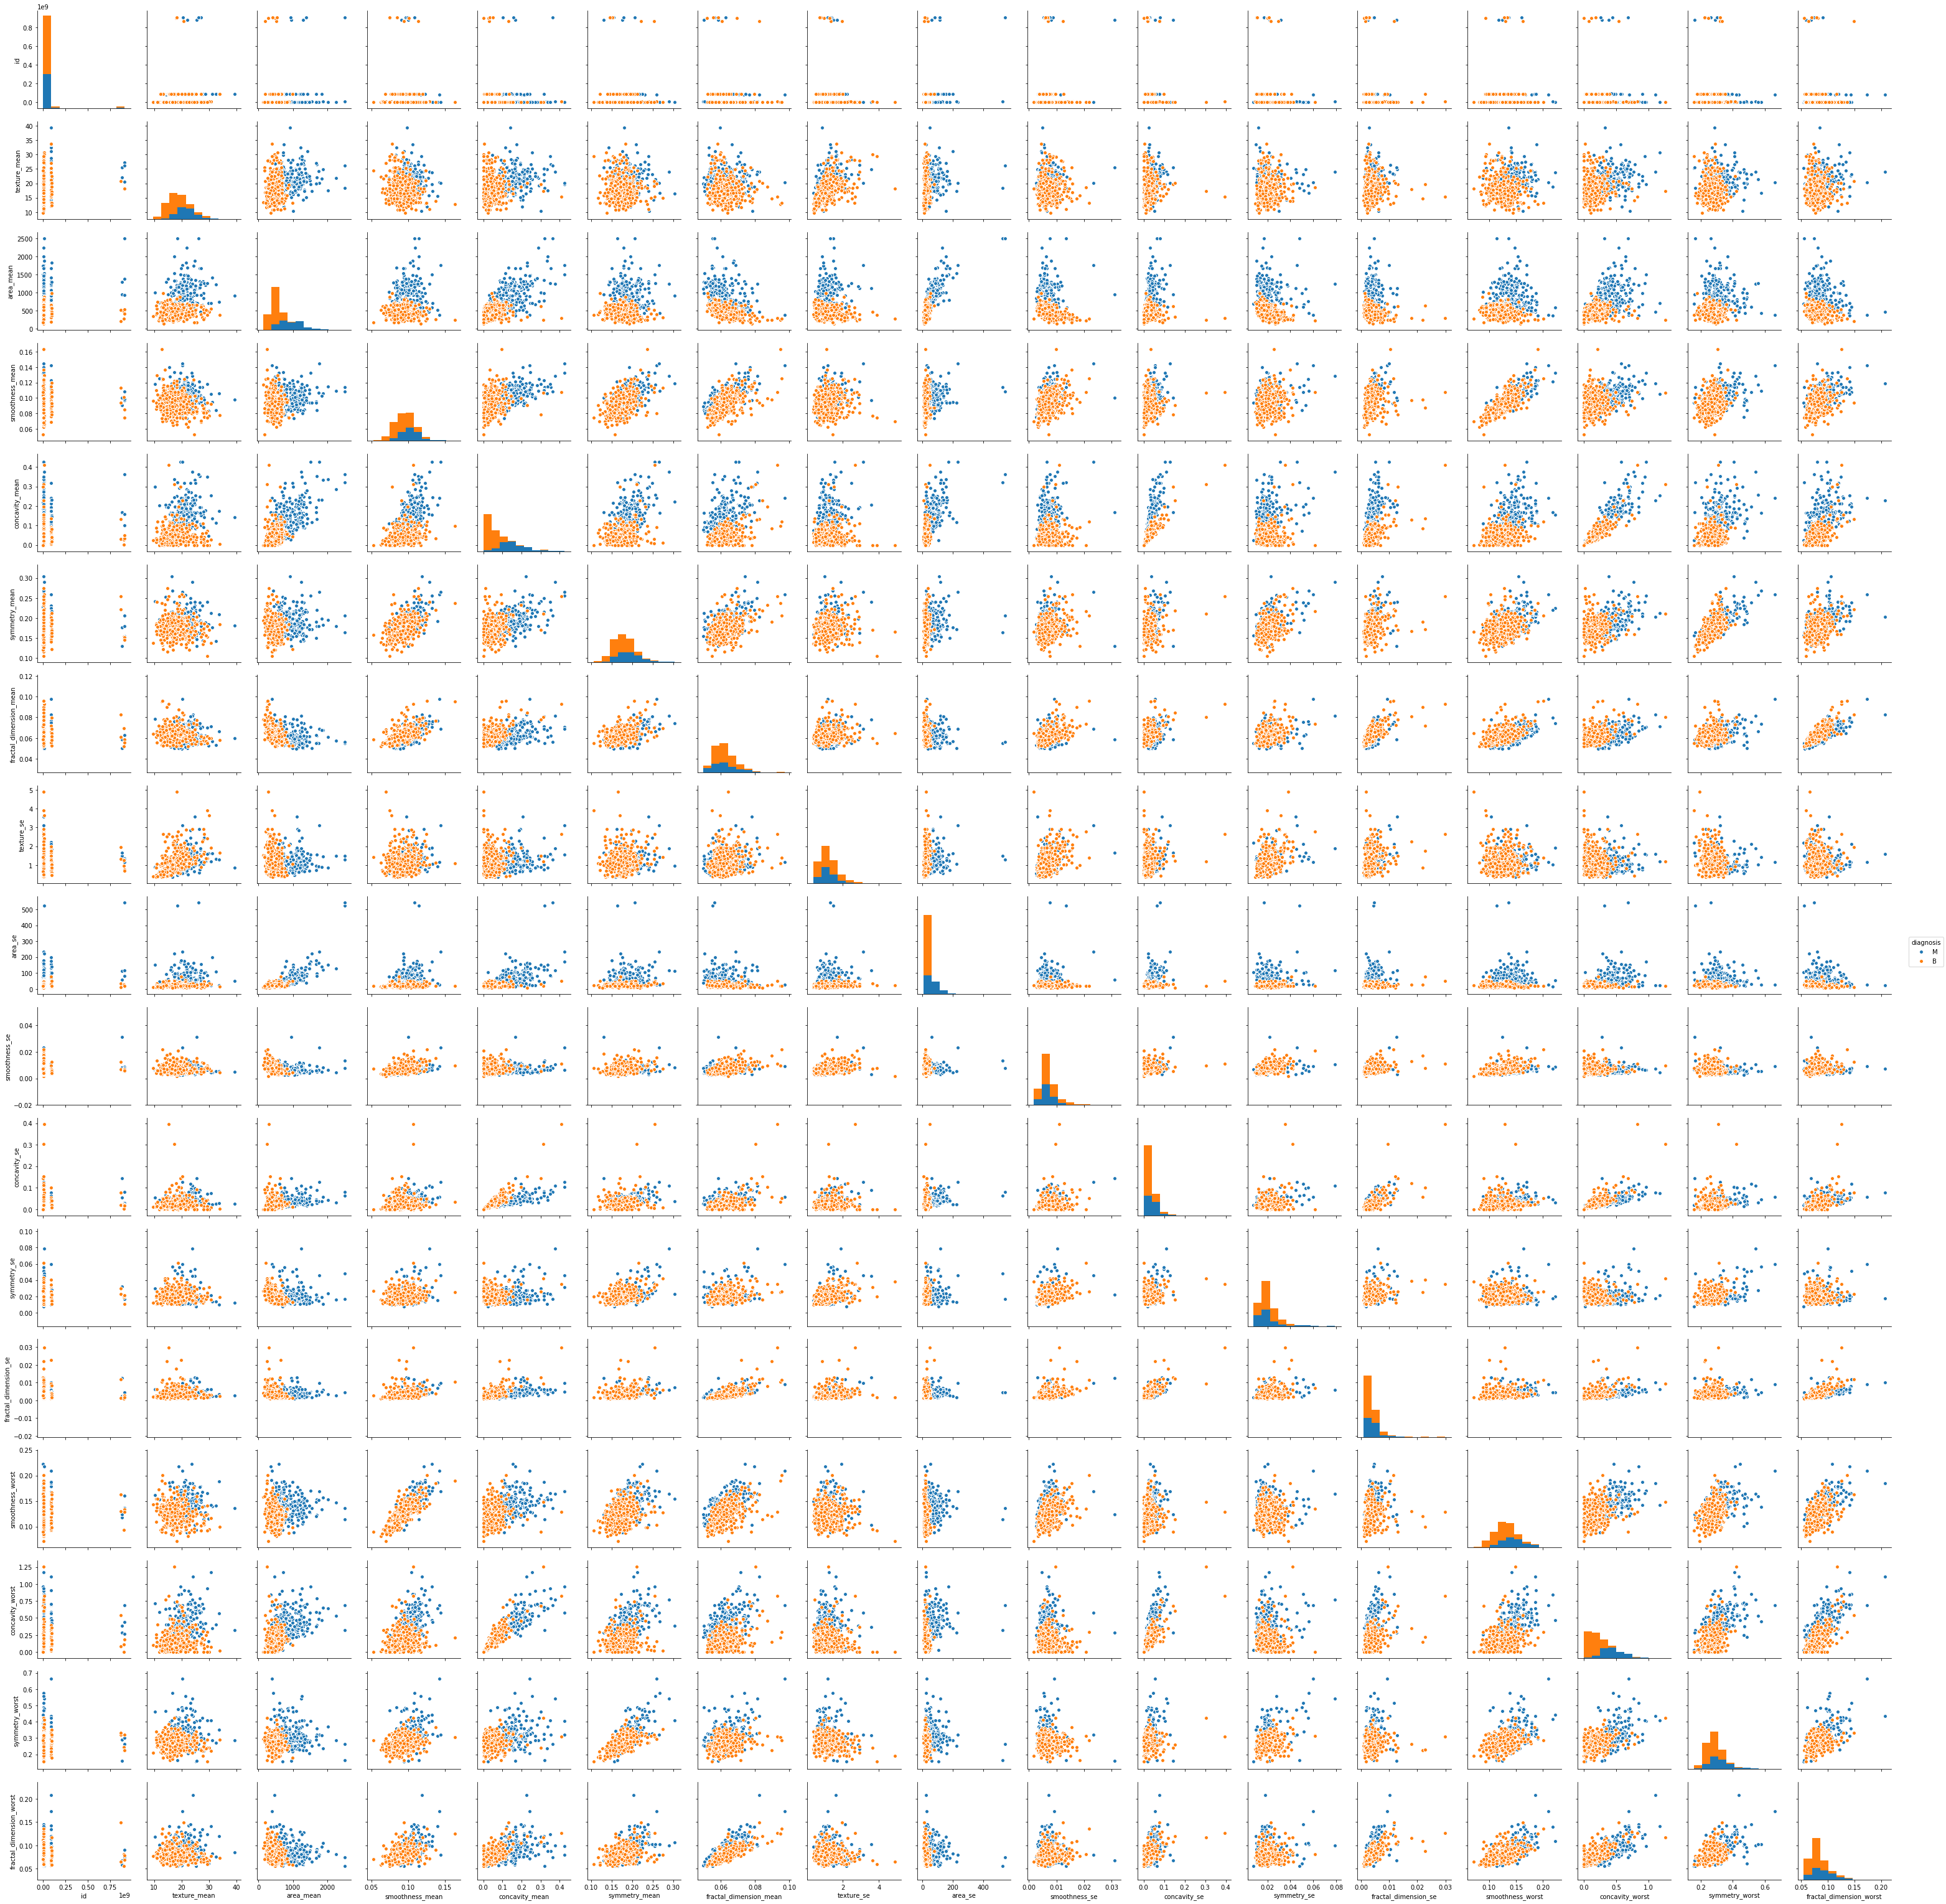

In [78]:
sns.pairplot(breast_cancer, hue = 'diagnosis')

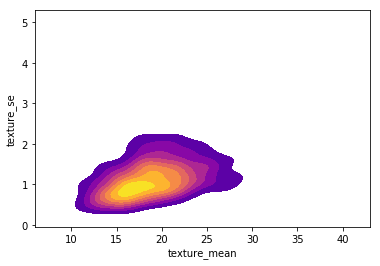

In [84]:
sns.kdeplot(breast_cancer['texture_mean'], breast_cancer['texture_se'], shade = True, shade_lowest = False, cmap = 'plasma')

C:\Users\Harshal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Harshal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


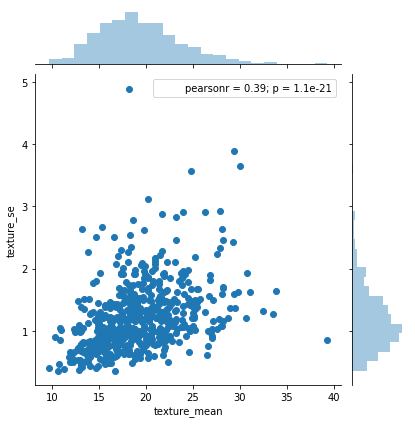

In [86]:
sns.jointplot(breast_cancer['texture_mean'], breast_cancer['texture_se'], data = breast_cancer)

In [12]:
x = breast_cancer.drop('diagnosis', axis = 1)
y = breast_cancer['diagnosis']

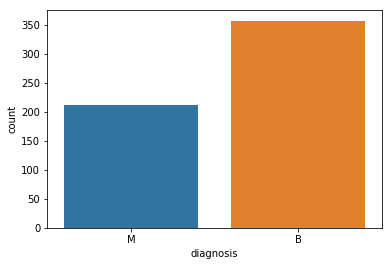

In [13]:
sns.countplot(y)

In [14]:
x = x.drop('id', axis = 1)

In [15]:
x.describe()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,19.289649,654.889104,0.096360,0.088799,0.181162,0.062798,1.216853,40.337079,0.007041,0.031894,0.020542,0.003795,0.132369,0.272188,0.290076,0.083946
std,4.301036,351.914129,0.014064,0.079720,0.027414,0.007060,0.551648,45.491006,0.003003,0.030186,0.008266,0.002646,0.022832,0.208624,0.061867,0.018061
min,9.710000,143.500000,0.052630,0.000000,0.106000,0.049960,0.360200,6.802000,0.001713,0.000000,0.007882,0.000895,0.071170,0.000000,0.156500,0.055040
25%,16.170000,420.300000,0.086370,0.029560,0.161900,0.057700,0.833900,17.850000,0.005169,0.015090,0.015160,0.002248,0.116600,0.114500,0.250400,0.071460
50%,18.840000,551.100000,0.095870,0.061540,0.179200,0.061540,1.108000,24.530000,0.006380,0.025890,0.018730,0.003187,0.131300,0.226700,0.282200,0.080040
75%,21.800000,782.700000,0.105300,0.130700,0.195700,0.066120,1.474000,45.190000,0.008146,0.042050,0.023480,0.004558,0.146000,0.382900,0.317900,0.092080
max,39.280000,2501.000000,0.163400,0.426800,0.304000,0.097440,4.885000,542.200000,0.031130,0.396000,0.078950,0.029840,0.222600,1.252000,0.663800,0.207500


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [18]:
y = y.map({'M':0, 'B':1})

In [19]:
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(x_train, y_train)
predict1 = knn1.predict(x_test)

In [106]:
y_test1 = y_test.map({'M':0, 'B':1})

In [20]:
print(accuracy_score(y_test, predict1))

0.9064327485380117


### UNIVARIATE FEATURE SELECTION

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [22]:
select = SelectKBest(chi2, k = 5).fit(x_train, y_train)

In [23]:
list(zip(select.scores_, x_train.columns))

[(60.69164330517238, 'texture_mean'),
 (36689.95565960427, 'area_mean'),
 (0.1000151750331587, 'smoothness_mean'),
 (13.054764972745549, 'concavity_mean'),
 (0.19598284728847654, 'symmetry_mean'),
 (0.0003425750717589049, 'fractal_dimension_mean'),
 (0.040713102622250696, 'texture_se'),
 (6127.410670385931, 'area_se'),
 (0.0013247037199600453, 'smoothness_se'),
 (0.6928967190877796, 'concavity_se'),
 (0.00139557805722813, 'symmetry_se'),
 (0.0026592707093492486, 'fractal_dimension_se'),
 (0.26322631413503794, 'smoothness_worst'),
 (25.885811665660942, 'concavity_worst'),
 (1.0063513808449258, 'symmetry_worst'),
 (0.12308734679699013, 'fractal_dimension_worst')]

**area_mean**, **area_se**, **texture_mean**, **concavity_worst**, **concavity_mean**

In [24]:
x_train2 = select.transform(x_train)
x_test2 = select.transform(x_test)

knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(x_train2, y_train)

predict2 = knn2.predict(x_test2)

print(accuracy_score(y_test, predict2))

0.9064327485380117


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
forest = RandomForestClassifier(random_state = 40)
forest.fit(x_train2, y_train)
predict3 = forest.predict(x_test2)

print(accuracy_score(y_test, predict3))

0.9590643274853801


### RECURSIVE FEATURE ELEIMINATION

In [27]:
from sklearn.feature_selection import RFE

In [28]:
random_forest = RandomForestClassifier(random_state = 40)
rfe = RFE(estimator = random_forest, n_features_to_select = 5, step = 1)

In [29]:
rfe = rfe.fit(x_train, y_train)

In [30]:
rfe.support_

array([False,  True, False,  True, False, False, False,  True, False,
       False, False, False,  True,  True, False, False])

In [31]:
print('BEST 5 FEATURES BY RFE: ', x_train.columns[rfe.support_])

BEST 5 FEATURES BY RFE:  Index(['area_mean', 'concavity_mean', 'area_se', 'smoothness_worst',
       'concavity_worst'],
      dtype='object')


In [32]:
x_train3 = rfe.transform(x_train)
x_test3 = rfe.transform(x_test)

random_forest.fit(x_train3, y_train)

predict4 = random_forest.predict(x_test3)

print(accuracy_score(y_test, predict4))

0.9590643274853801


### RECURSIVE FEATURE ELEIMINATION WITH CROSS-VALIDATION

In [33]:
from sklearn.feature_selection import RFECV

In [34]:
rfecv = RFECV(estimator = random_forest, step = 1, cv = 10, scoring = 'accuracy')

In [35]:
rfecv = rfecv.fit(x_train, y_train)

In [36]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [37]:
x_train.columns[rfecv.support_]

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')

In [38]:
rfecv.grid_scores_

array([0.75368421, 0.88671053, 0.89947368, 0.91223684, 0.91697368,
       0.93960526, 0.93434211, 0.93697368, 0.93684211, 0.93460526,
       0.93710526, 0.94434211, 0.94460526, 0.94697368, 0.95223684,
       0.94710526])

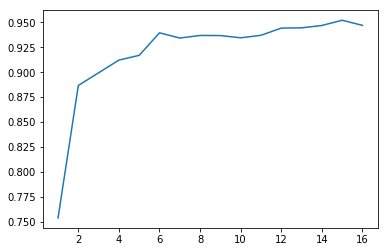

In [39]:
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

### TREE BASED FEATURE SELECTION

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

In [41]:
trees = ExtraTreesClassifier()

In [42]:
trees.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
list(zip(x_train.columns, sorted(trees.feature_importances_, reverse = True)))

[('texture_mean', 0.1668209996096402),
 ('area_mean', 0.1591709324395349),
 ('smoothness_mean', 0.15627172866883848),
 ('concavity_mean', 0.10426760246828257),
 ('symmetry_mean', 0.07329620458048597),
 ('fractal_dimension_mean', 0.06550933124994038),
 ('texture_se', 0.04154350958405676),
 ('area_se', 0.034000148914940326),
 ('smoothness_se', 0.030852229133438908),
 ('concavity_se', 0.028380123507564053),
 ('symmetry_se', 0.026855602617937503),
 ('fractal_dimension_se', 0.02521382534684799),
 ('smoothness_worst', 0.024864248722011796),
 ('concavity_worst', 0.023660030860184967),
 ('symmetry_worst', 0.019742091284302772),
 ('fractal_dimension_worst', 0.019551391011992464)]

In [44]:
imp_features = trees.feature_importances_
indices = np.argsort(imp_features)[::-1]

In [45]:
indices

array([ 3,  1, 13,  7,  0, 14,  2, 12,  4, 15, 10, 11,  5,  8,  9,  6],
      dtype=int64)

**texture_mean**, **area_mean**, **smoothness_mean**, **concavity_mean**, **symmetry_mean**

([<matplotlib.axis.XTick at 0xc64d93e908>,
 <a list of 16 Text xticklabel objects>)

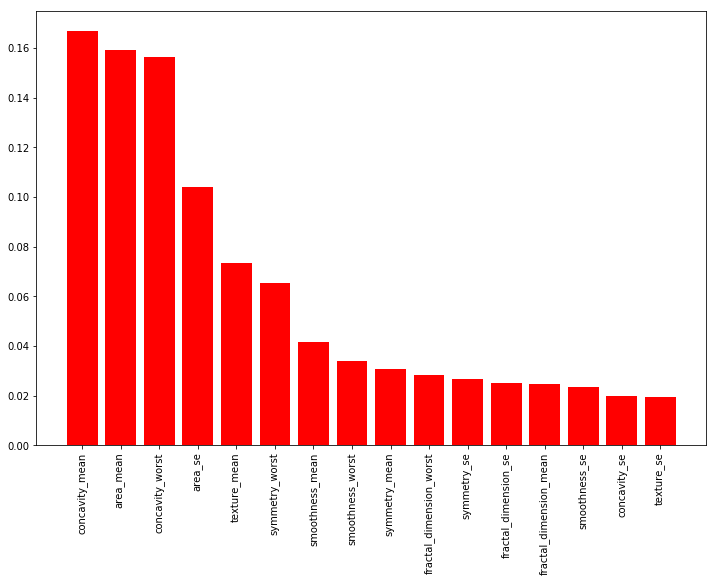

In [46]:
plt.figure(figsize = (12,8))
plt.bar(range(x_train.shape[1]),  sorted(trees.feature_importances_, reverse = True), color = 'r')
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)

#### THE ABOVE FIGURE SHOWS THE FIRST FEW FEATURES WHICH ARE MOST IMPORTANT. THE IMPORTANCE OF THE FEATURES FADES AS WE MOVE FROM LEFT TO RIGHT.

**CONCAVITY_MEAN**, **AREA_MEAN**, **CONCAVITY_WORSE**, **AREA_SE**, **TEXTURE_MEAN** ARE SEEN TO HAVE MORE IMPORTANCE THAN THE REST OF THE FEATURES.

## STANDARDIZING THE DATASET

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [49]:
x_train.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
149,17.91,585.0,0.07944,0.02881,0.1473,0.05580,0.7574,21.47,0.002838,0.01780,0.01329,0.001976,0.09711,0.1564,0.2350,0.07014
124,16.39,553.5,0.07115,0.08092,0.1422,0.05823,1.1400,14.66,0.005919,0.04957,0.01208,0.004076,0.10250,0.3308,0.2048,0.07628
421,13.98,656.1,0.10310,0.14500,0.2086,0.07406,1.5110,49.45,0.009976,0.05278,0.02653,0.005444,0.13120,0.3219,0.2827,0.09208
195,16.33,516.4,0.07941,0.03873,0.1829,0.05667,0.9086,15.75,0.005298,0.02321,0.01853,0.002152,0.10970,0.1764,0.3024,0.06949
545,23.23,573.2,0.09246,0.02974,0.1664,0.05801,1.3360,31.24,0.005868,0.02021,0.02087,0.002583,0.12160,0.1049,0.2642,0.06953


In [50]:
type(x_train_std)

numpy.ndarray

In [88]:
print(x_train_std.max())

12.117676354989808


In [52]:
x_train_std.mean()

9.735372753622603e-17

In [53]:
x_train_std.std()

1.0

In [54]:
random_forest.fit(x_train_std, y_train)
pred = random_forest.predict(x_test_std)

print(accuracy_score(y_test, pred))

0.9707602339181286


## GRID SEARCH CV

In [64]:
from sklearn.grid_search import GridSearchCV

C:\Users\Harshal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Harshal\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [69]:
k_range = np.arange(1,31)

In [70]:
param_grid = dict(n_neighbors = k_range)

In [72]:
grid = GridSearchCV(KNeighborsClassifier(n_neighbors = k_range), param_grid = param_grid, scoring = 'accuracy', cv = 5)

In [73]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1,
           n_neighbors=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
           p=2, weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [74]:
grid.best_params_

{'n_neighbors': 8}

In [75]:
grid.best_score_

0.8844221105527639

In [76]:
grid.grid_scores_

[mean: 0.83668, std: 0.02152, params: {'n_neighbors': 1},
 mean: 0.85427, std: 0.03073, params: {'n_neighbors': 2},
 mean: 0.85176, std: 0.02530, params: {'n_neighbors': 3},
 mean: 0.86683, std: 0.03360, params: {'n_neighbors': 4},
 mean: 0.86683, std: 0.03748, params: {'n_neighbors': 5},
 mean: 0.87186, std: 0.03822, params: {'n_neighbors': 6},
 mean: 0.87688, std: 0.03305, params: {'n_neighbors': 7},
 mean: 0.88442, std: 0.03126, params: {'n_neighbors': 8},
 mean: 0.88191, std: 0.03516, params: {'n_neighbors': 9},
 mean: 0.87940, std: 0.03357, params: {'n_neighbors': 10},
 mean: 0.87940, std: 0.02929, params: {'n_neighbors': 11},
 mean: 0.87688, std: 0.03038, params: {'n_neighbors': 12},
 mean: 0.87940, std: 0.03357, params: {'n_neighbors': 13},
 mean: 0.87688, std: 0.03689, params: {'n_neighbors': 14},
 mean: 0.88442, std: 0.03126, params: {'n_neighbors': 15},
 mean: 0.87940, std: 0.03357, params: {'n_neighbors': 16},
 mean: 0.87940, std: 0.03357, params: {'n_neighbors': 17},
 mean: